In [115]:
import numpy as np

a = np.array([0,1,2,3,4,5])
print(a)
print(a.ndim)
print(a.shape)

b = a.reshape((3, 2))
print(b)
print(b.ndim)
print(b.shape)

[0 1 2 3 4 5]
1
(6,)
[[0 1]
 [2 3]
 [4 5]]
2
(3, 2)


In [116]:
a =a*2
a
a.clip(min=0, max=15)

array([ 0,  2,  4,  6,  8, 10])

In [117]:
c = np.array([1, 2, np.NAN, 3, 4])
c
np.isnan(c)
c[~np.isnan(c)]
np.mean(c[~np.isnan(c)])

2.5

In [118]:
# ch 1
data = np.genfromtxt("web_traffic.tsv", delimiter="\t")
data.shape

hours = data[:, 0]
hits = data[:, 1]
np.sum(np.isnan(hours))

hours = hours[~np.isnan(hits)]
hits = hits[~np.isnan(hits)]

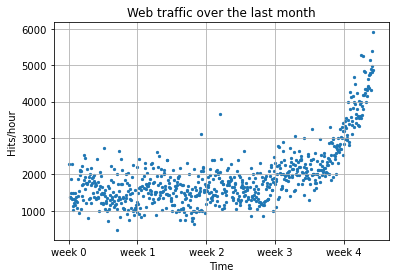

In [119]:
import matplotlib.pyplot as plt

plt.scatter(hours,hits, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(5)],
 ['week %i'%w for w in range(5)])
    
plt.autoscale(tight=False)
plt.grid()
plt.show()

In [120]:
fitted_model_function, error, rank, sv, rcond = np.polyfit(hours, hits, 1, full=True)
print("Model parameters: %s" % fp1)

print(f"Error calculated by np: {error}")

def error(f, x, y):
 return np.sum((f(x)-y)**2)

fitted_function_first = sp.poly1d(fitted_model_function)
print(f"Error calculated by function: {error(fitted_function_first, hours, hits)}")

Model parameters: [  2.59619213 989.02487106]
Error calculated by np: [3.17389767e+08]
Error calculated by function: 317389767.339778


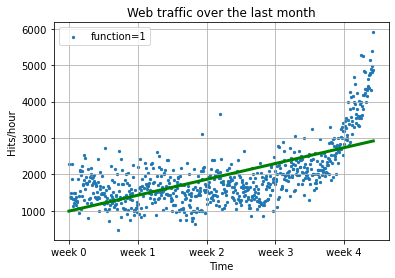

In [121]:
plt.scatter(hours,hits, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(5)],
 ['week %i'%w for w in range(5)])
    
plt.autoscale(tight=False)
plt.grid()


fx = np.linspace(0,hours[-1], 1000)
plt.plot(fx, fitted_function_first(fx),"g-", linewidth=3)
plt.legend(["function=%i" % fitted_function_first.order], loc="upper left")

plt.show()

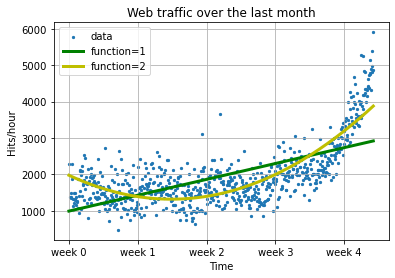

In [137]:
fitted_model_function_second = np.polyfit(hours, hits, 2)

fitted_function_second = np.poly1d(fitted_model_function_second)

plt.scatter(hours,hits, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(5)],
 ['week %i'%w for w in range(5)])
    
plt.autoscale(tight=False)
plt.grid()


fx_first = np.linspace(0,hours[-1], 1000)
plt.plot(fx_first, fitted_function_first(fx_first),"g-", linewidth=3)


fx_second = np.linspace(0,hours[-1], 1000)
plt.plot(fx_second, fitted_function_second(fx_second),"y-", linewidth=3)

plt.legend(["data" ,
            "function=%i" % fitted_function_first.order, 
            "function=%i" % fitted_function_second.order], loc="upper left")

plt.show()

In [144]:
seperation_point = int(3.5*7*24)
#wert für die teilung

hours_before = hours[:seperation_point]
hits_before = hits[:seperation_point]

hours_after = hours[seperation_point:]
hits_after = hits[seperation_point:]

f_before = np.poly1d(np.polyfit(hours_before, hits_before, 1))
f_after = np.poly1d(np.polyfit(hours_after, hits_after, 1))

f_before_error = error(f_before, hours_before, hits_before)
f_after_error = error(f_after, hours_after, hits_after)

print(f"Error Before: {f_before_error}")
print(f"Error After: {f_after_error}")

Error Before: 110806407.08999813
Error After: 22143941.107618243


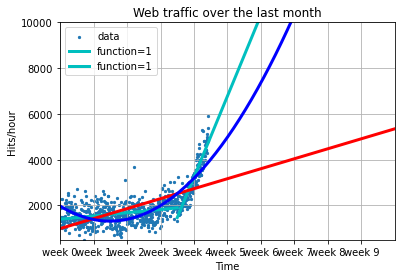

In [187]:
plt.scatter(hours,hits, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.xticks([w*7*24 for w in range(10)],
 ['week %i'%w for w in range(10)])
    
plt.grid()


fx_before = np.linspace(0,seperation_point, 1000)
plt.plot(fx_before, f_before(fx_before),"c-", linewidth=3)


fx_after = np.linspace(seperation_point,10000, 10000)
plt.plot(fx_after, f_after(fx_after),"c-", linewidth=3)


fx_first = np.linspace(0,10000, 1000)
plt.plot(fx_first, fitted_function_first(fx_first),"r-", linewidth=3)


fx_second = np.linspace(0,10000, 1000)
plt.plot(fx_second, fitted_function_second(fx_second),"b-", linewidth=3)


plt.legend(["data" ,
            f"function={f_before.order}", 
            f"function={f_after.order}"], loc="upper left")


plt.ylim( [ 500, 10000 ] )
plt.xlim([0, 10*7*24])

plt.show()

In [195]:
print(fitted_function_second)

from scipy.optimize import fsolve

reached_max = fsolve(fitted_function_second-100000, 800)/(7*24)

print("100,000 hits/hour expected at week %f" % reached_max[0])

#kein Testset

         2
0.01053 x - 5.265 x + 1975
100,000 hits/hour expected at week 19.708090
